# Node Centrality 

## Introduction

Dijkstra's algorithm and other path related searches are essential for establishing a common distance metric within network graphs. With that, one can investigate relationships between nodes. For example, in the context of social networks, one might wonder who is the most influential to various social circles. Alternatively, if you were studying the spread of disease, it would be important to identify key stakeholders for quarantining the disease off from subpopulations. The umbrella term for these metrics is known as centrality. In this lesson, you'll take a look at four measures of centrality and how they can collectively uncover important relationships within networks.

## Objectives

You will be able to:

* Understand and explain network centrality and its importance in graph analysis
* Understand and calculate Degree, Closeness, Betweenness and Eigenvector centrality measures
* Describe the use case for several centrality measures

## Centrality

A central concept to graphs is centrality. Take the social network below, created from a subset of twitter data. Some of the nodes are enmeshed in the network, with many connections amongst other nodes. Others, such as node 95, are tied to this central hub, but only weakly through a single connection to the main hub. Two nodes, 86 and 87, aren't even directly tied to the main cluster, and are floating on an island on their own. By quantifying the relationships between nodes, one can better understand the underlying structure of networks.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/learn-env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


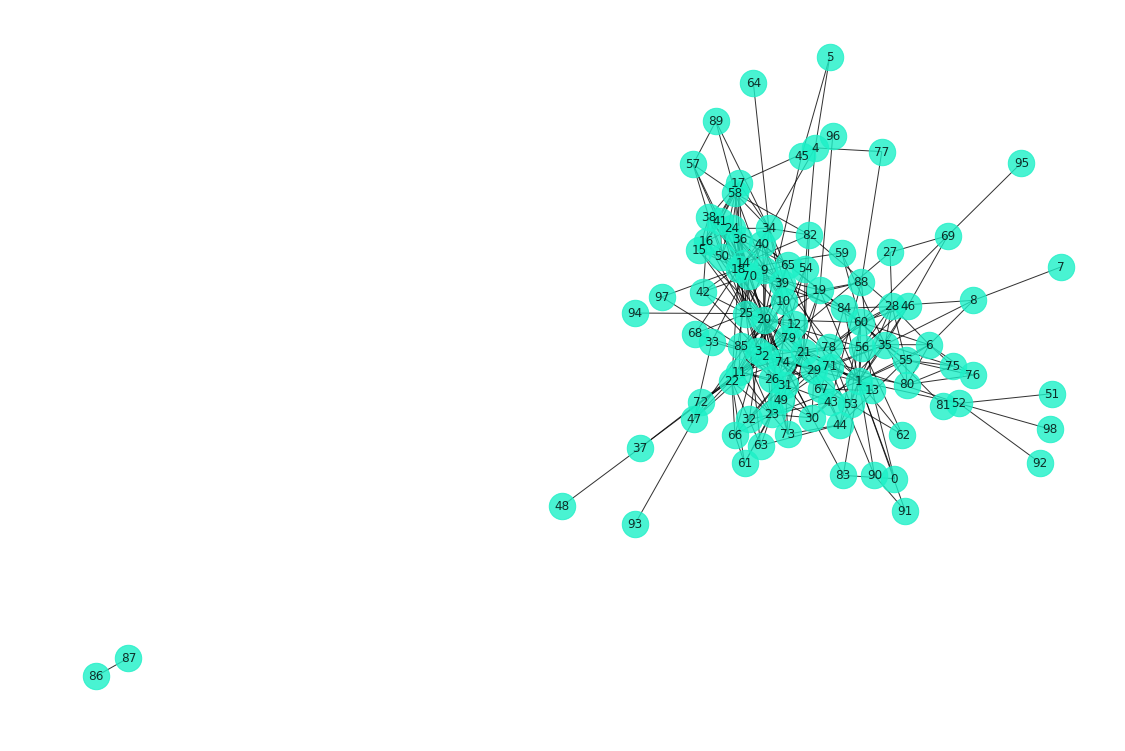

In [3]:
#Load the Network from File
G = nx.read_edgelist("twitter.edges")
#Simplify the Node Labels
G = nx.relabel_nodes(G, dict(zip(G.nodes, range(len(G.nodes)))))
#Create a matplotlib figure
fig = plt.figure(figsize=(15,10))
#Draw the network!
nx.draw(G, pos=nx.spring_layout(G), random_state=5, with_labels=True,
        alpha=.8, node_color="#1cf0c7", node_size=700)

## Degree Centrality 

The most primitive measure of centrality is degree centrality. This is simply the number of edges attached to a node. In directed graphs, one can measure both the in-degree and out-degree of nodes. Implementing this in NetworkX is incredibly straightforward:

In [7]:
nx.degree(G)

DegreeView({0: 3, 1: 24, 2: 13, 3: 10, 4: 5, 5: 2, 6: 9, 7: 1, 8: 4, 9: 14, 10: 7, 11: 14, 12: 7, 13: 5, 14: 20, 15: 7, 16: 8, 17: 10, 18: 21, 19: 10, 20: 26, 21: 22, 22: 10, 23: 15, 24: 13, 25: 20, 26: 8, 27: 3, 28: 10, 29: 14, 30: 7, 31: 9, 32: 4, 33: 3, 34: 14, 35: 14, 36: 10, 37: 3, 38: 12, 39: 7, 40: 11, 41: 15, 42: 5, 43: 6, 44: 7, 45: 2, 46: 6, 47: 6, 48: 1, 49: 8, 50: 8, 51: 1, 52: 5, 53: 6, 54: 4, 55: 9, 56: 5, 57: 5, 58: 10, 59: 3, 60: 16, 61: 4, 62: 3, 63: 4, 64: 1, 65: 7, 66: 5, 67: 4, 68: 3, 69: 4, 70: 12, 71: 8, 72: 5, 73: 6, 74: 15, 75: 5, 76: 4, 77: 2, 78: 5, 79: 7, 80: 6, 81: 1, 82: 5, 83: 3, 84: 4, 85: 7, 86: 1, 87: 1, 88: 5, 89: 3, 90: 3, 91: 2, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 2, 98: 1})

## Closeness Centrality

Next, let's discuss closeness. The closeness of a node is roughly the average distance from that node to any other node in the network. As such, it relies upon Dijkstra's algorithm in defining the distance between two nodes. 


In [4]:
#The Closeness for a central node
print(nx.closeness_centrality(G, 4))
#The Closeness Metric for an ostracized node
print(nx.closeness_centrality(G, 86))

0.32540074853470796
0.01020408163265306


In [10]:
nx.closeness_centrality(G)[4]

0.32540074853470796

## Betweenness Centrality

Rather then simply looking at the distance between nodes, betweenness centrality investigates whether a node is a key stepping stone in moving between nodes. More specifically, betweenness investigates the number of shortest paths that a node lies on. To calculate betweenness, you must first calculate the shortest path between all node pairs using Dijkstra's algorithm. From there, one counts the number of paths from this output that the node in question lies on. Finally, this number is then normalized to be on a scale from 0 to 1. In other words, in order to compute betweenness for a single node, one must count the number of shortest paths each node lies on. The normalization from 0 to 1 involves subtracting the minimum number of paths any node in the network lies on and dividing by the maximum number of paths any node lies on.

In [5]:
#The Betweeness Metric for a central node
print(nx.betweenness_centrality(G)[4])
#The Betweeness Metric for an ostracized node
print(nx.betweenness_centrality(G)[86])

0.016522004108264238
0.0


## Eigenvector Centrality

Eigenvector centrality is an iterative algorithm that attempts to measure a nodes relative influence in the network. The underlying motivation is that degree centrality can be refined to incorporate the relative importance of neighboring nodes. In other words, a connection to a central node is more important then a connection to an isolated one. As with the previous measures of centrality, NetworkX makes calculating the eigenvector centrality quite easy.

In [6]:
nx.eigenvector_centrality(G)
# The eigenvector Metric for a central node
print(nx.eigenvector_centrality(G)[4])
#The eigenvector Metric for an ostracized node
print(nx.eigenvector_centrality(G)[86])

0.028875860204350325
2.505996464597042e-27


## Putting it All Together

With that, let's investigate some of these measures for the twitter network displayed above. To do this, take a look at a few different types of nodes in the network based on their relationship to the overall group. How would you expect the centrality metrics would compare between some of these various groups?

<img src="images/node_examples.png">

In [35]:
import pandas as pd

degrees = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)
eigs = nx.eigenvector_centrality(G)
df = pd.DataFrame([degrees, closeness, betweeness, eigs]).transpose()
df.columns = ["degrees", "closeness", "betweeness", "eigs"]
#Some Nodes to Investigate
islanders = [86,87]
peninsulas = [51,92,98,95]
bridges = [52,96]
peripheral = [57,97]
centers = [74,3,20]
temp = {"islanders":islanders,
       "peninsulas":penisulas,
       "bridges":bridges,
       "peripherial":peripherial,
       "centers":centers}
node_label_dict = {}
for label in temp.keys():
    nodes = temp[label]
    for node in nodes:
        node_label_dict[node]=label
ex_nodes = islanders + penisulas + bridges + periphial + centers
df['group'] = df.index.map(node_label_dict)
df.iloc[ex_nodes]

,degrees,closeness,betweeness,eigs,group
86,0.010204,0.010204,0.000000,2.505996e-27,islanders
87,0.010204,0.010204,0.000000,2.505996e-27,islanders
51,0.010204,0.271794,0.000000,2.311366e-03,penisulas
92,0.010204,0.271794,0.000000,2.311366e-03,penisulas
98,0.010204,0.271794,0.000000,2.311366e-03,penisulas
95,0.010204,0.245537,0.000000,1.181819e-03,penisulas
52,0.051020,0.374665,0.059331,2.715085e-02,bridges
96,0.010204,0.304339,0.000000,8.021756e-03,bridges
57,0.051020,0.318782,0.001811,7.223395e-02,periphial
97,0.020408,0.320958,0.000326,2.937446e-02,periphial


In [36]:
df.groupby('group').mean()

,degrees,closeness,betweeness,eigs
group,,,,
bridges,0.030612,0.339502,0.029665,1.758630e-02
centers,0.173469,0.453541,0.071576,1.800014e-01
islanders,0.010204,0.010204,0.000000,2.505996e-27
penisulas,0.010204,0.265230,0.000000,2.028979e-03
periphial,0.035714,0.319870,0.001069,5.080421e-02


As you can see, the central nodes have the highest measures of centrality across the board. Interestingly, the "bridge" nodes, which connect some outside nodes to the center have a fairly high level of betweenness due to their importance in maintaining this intermediate relationship. Additionally, of the center nodes, node 20 appears to be particularly influential given its exceedingly large betweenness centrality.

## Summary

In this lesson you investigated concepts of centrality in networks. Specifically, you took a look at four measures of centrality: degree, closeness, betweenness and eigenvector centrality. From here, you'll further investigate these concepts and their interpretation in the context of a real world social network.